In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")

# Data Processing

In [42]:
#Reading the data of the disney movies
movie= pd.read_csv('disney_movies_total_gross.csv')
movie.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [43]:
movie.isna().sum()

movie_title                  0
release_date                 0
genre                       17
MPAA_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [44]:
#Changing the release date format
movie['release_date'] = pd.to_datetime(movie['release_date'])

In [45]:
#Filling the missing data in genre into NULL
movie.fillna('NULL', inplace = True)

In [46]:
#Reomve the MPAA rating and inflation adjusted gross as it is no use for the following analysis
movie = movie.drop(['MPAA_rating','inflation_adjusted_gross'], 1)
movie.head()

,movie_title,release_date,genre,total_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,"$184,925,485"
1,Pinocchio,1940-02-09,Adventure,"$84,300,000"
2,Fantasia,1940-11-13,Musical,"$83,320,000"
3,Song of the South,1946-11-12,Adventure,"$65,000,000"
4,Cinderella,1950-02-15,Drama,"$85,000,000"


In [47]:
#Remove the commas and dollar sign in total gross
movie['total_gross'] = movie['total_gross'].str.replace(',','')
movie['total_gross'] = movie['total_gross'].str.replace('$','')
movie['total_gross'] = movie['total_gross'].astype(int)
movie.head()

,movie_title,release_date,genre,total_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,184925485
1,Pinocchio,1940-02-09,Adventure,84300000
2,Fantasia,1940-11-13,Musical,83320000
3,Song of the South,1946-11-12,Adventure,65000000
4,Cinderella,1950-02-15,Drama,85000000


In [48]:
#Reading the data of disney directors
director=pd.read_csv('disney-director.csv')
director.head()
##As the data of director is very clean, there is no need to do data cleaning in this dataframe.

,name,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


In [71]:
director =director.rename(columns={'name':'movie_title'})

new_movie = pd.merge(movie, director)
new_movie.head()

,movie_title,release_date,genre,total_gross,director
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,184925485,David Hand
1,Pinocchio,1940-02-09,Adventure,84300000,Ben Sharpsteen
2,Fantasia,1940-11-13,Musical,83320000,full credits
3,Cinderella,1950-02-15,Drama,85000000,Wilfred Jackson
4,Cinderella,2015-03-13,Drama,201151353,Wilfred Jackson


In [50]:
#Reading the data of disney revenue
revenue =pd.read_csv('disney_revenue_1991-2016.csv')
revenue.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525


In [51]:
#Changing the name of the columns to be more readable
revenue =revenue.rename(columns={'Studio Entertainment[NI 1]':'StudioEntertainment','Disney Consumer Products[NI 2]':'DisneyConsumerProducts','Disney Interactive[NI 3][Rev 1]':'DisneyInteractive','Walt Disney Parks and Resorts':'WaltDisneyParks','Disney Media Networks':'DisneyMediaNetworks'})
revenue.head()

,Year,StudioEntertainment,DisneyConsumerProducts,DisneyInteractive,WaltDisneyParks,DisneyMediaNetworks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525


In [72]:
#Reading the data of most searched disney character
mostSearchChar =pd.read_csv('favourite character.csv')
mostSearchChar.head()

,Character Name,Moive,Instgram Posts,Annual Global Searches,Number of Major Disney Productions
0,Mickey Mouse,Mickey Mouse,1322500,34710000,6
1,Tinker Bell,Peter Pan,560000,10257000,10
2,Cinderella,Cinderella,1529500,20360000,6
3,Moana,Moana,1751000,26970000,3
4,Mulan,Mulan,1251500,25150000,5


# Data Cleaning

In [52]:
#Filling the na of the column
for i, row in revenue.iterrows():
    current = i 
    row_NonNa = i+1
    if pd.isnull(row['StudioEntertainment']):
        revenue.at[current, 'StudioEntertainment'] = (revenue.at[current-1, 'StudioEntertainment']+revenue.at[row_NonNa, 'StudioEntertainment'])/2
        
    if pd.isnull(row['DisneyConsumerProducts']):
      try:
        revenue.at[current, 'DisneyConsumerProducts'] = (revenue.at[current-1, 'DisneyConsumerProducts']+revenue.at[row_NonNa, 'DisneyConsumerProducts'])/2  
      except LookupError:
        revenue.at[current, 'DisneyConsumerProducts'] = 0
print(revenue)

    Year  StudioEntertainment  DisneyConsumerProducts  DisneyInteractive  \
0   1991              2593.00                   724.0                NaN   
1   1992              3115.00                  1081.0                NaN   
2   1993              3673.40                  1415.1                NaN   
3   1994              4793.00                  1798.2                NaN   
4   1995              6001.50                  2150.0                NaN   
5   1996              6491.25                  2966.0                NaN   
6   1997              6981.00                  3782.0              174.0   
7   1998              6849.00                  3193.0              260.0   
8   1999              6548.00                  3030.0              206.0   
9   2000              5994.00                  2602.0              368.0   
10  2001              7004.00                  2590.0                NaN   
11  2002              6465.00                  2440.0                NaN   
12  2003    

In [53]:
#Filling in null value in the middle of Disney Interactive
revenue.at[13,'DisneyInteractive']=(revenue.at[9,'DisneyInteractive']+revenue.at[17,'DisneyInteractive'])/2
revenue.at[11,'DisneyInteractive']=(revenue.at[9,'DisneyInteractive']+revenue.at[13,'DisneyInteractive'])/2 
revenue.at[10,'DisneyInteractive']=(revenue.at[9,'DisneyInteractive']+revenue.at[11,'DisneyInteractive'])/2   
revenue.at[12,'DisneyInteractive']=(revenue.at[11,'DisneyInteractive']+revenue.at[13,'DisneyInteractive'])/2     
revenue.at[15,'DisneyInteractive']=(revenue.at[13,'DisneyInteractive']+revenue.at[17,'DisneyInteractive'])/2
revenue.at[14,'DisneyInteractive']=(revenue.at[13,'DisneyInteractive']+revenue.at[15,'DisneyInteractive'])/2   
revenue.at[16,'DisneyInteractive']=(revenue.at[15,'DisneyInteractive']+revenue.at[17,'DisneyInteractive'])/2 

revenue.at[25,'DisneyConsumerProducts']=revenue.at[24,'DisneyConsumerProducts'] * 1 +((revenue.at[24,'DisneyConsumerProducts']+revenue.at[23,'DisneyConsumerProducts'])/revenue.at[23,'DisneyConsumerProducts'])
revenue.at[25,'DisneyInteractive']=revenue.at[24,'DisneyInteractive'] * 1 +((revenue.at[24,'DisneyInteractive']+revenue.at[23,'DisneyInteractive'])/revenue.at[23,'DisneyInteractive'])

revenue.at[5,'DisneyMediaNetworks']=4142

revenue['DisneyMediaNetworks'] = pd.to_numeric(revenue['DisneyMediaNetworks'])

revenue = revenue.dropna()
revenue['Year'] = revenue['Year'].apply(str)

print(revenue)

    Year  StudioEntertainment  DisneyConsumerProducts  DisneyInteractive  \
6   1997               6981.0             3782.000000         174.000000   
7   1998               6849.0             3193.000000         260.000000   
8   1999               6548.0             3030.000000         206.000000   
9   2000               5994.0             2602.000000         368.000000   
10  2001               7004.0             2590.000000         411.875000   
11  2002               6465.0             2440.000000         455.750000   
12  2003               7364.0             2344.000000         499.625000   
13  2004               8713.0             2511.000000         543.500000   
14  2005               7587.0             2127.000000         587.375000   
15  2006               7529.0             2193.000000         631.250000   
16  2007               7491.0             2347.000000         675.125000   
17  2008               7348.0             2415.000000         719.000000   
18  2009    

# Data Visualization

In [55]:
df = pd.read_csv("revenue2006-2021.csv")
df.head()

,Year,Revenue in billion U.S. dollars
0,2006,33.75
1,2007,35.51
2,2008,37.84
3,2009,36.15
4,2010,38.06


[Text(0.5, 1.0, 'Global revenue of the Walt Disney Company in the fiscal years 2006 to 2021')]

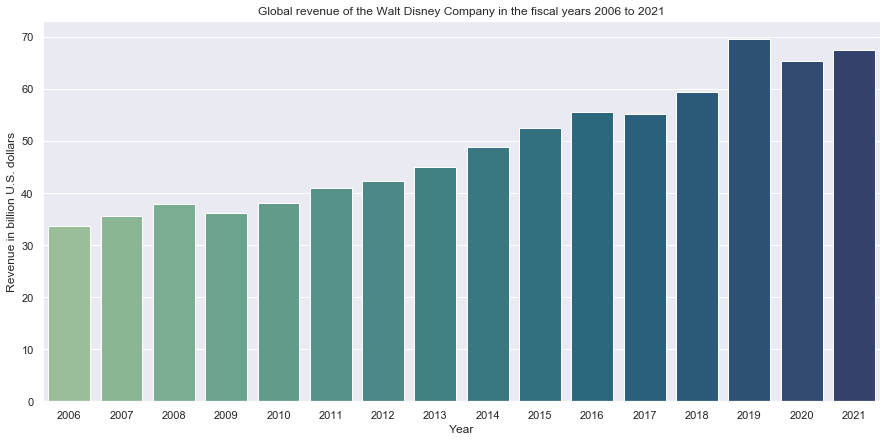

In [56]:
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Year", y = "Revenue in billion U.S. dollars", ax=ax, data=df, palette="crest").set(
    title='Global revenue of the Walt Disney Company in the fiscal years 2006 to 2021')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

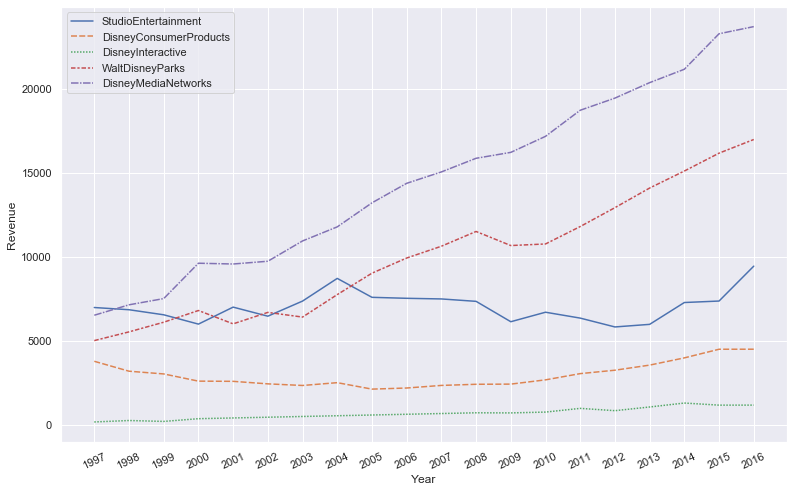

In [57]:
"""There shows the revenue in each section of Disney from 1997 to 2016.
We can see the revenue of each section keep increasing.
Especially the revenue of Disney Media Network, it increase substantially
"""

revenue_time = revenue.drop(['Total'], axis = 1)
revenue_time = revenue_time.set_index('Year')

plt.figure(figsize=(13,8))
sns.lineplot(data=revenue_time)
plt.ylabel("Revenue")
plt.xticks(rotation = 25)

C:\Users\Owen\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<Figure size 1080x1080 with 0 Axes>

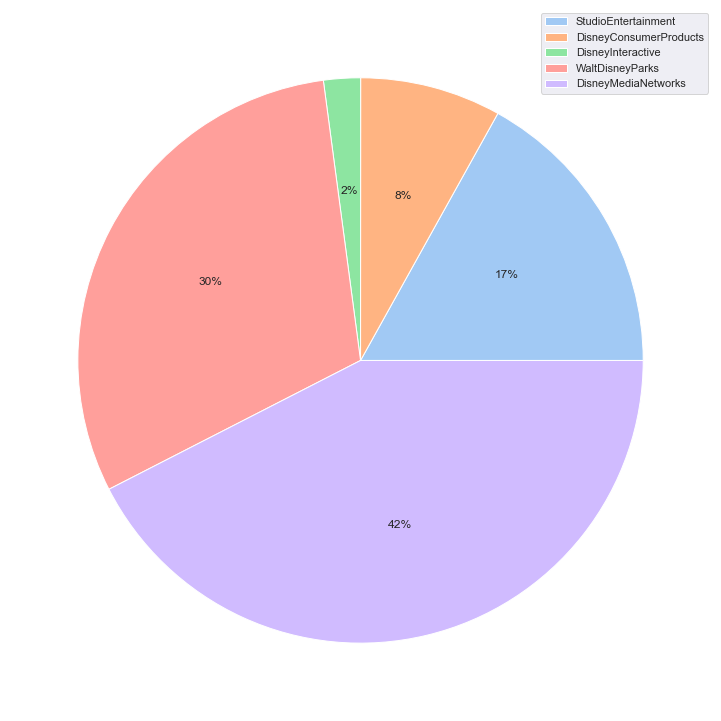

In [69]:
plt.figure(figsize=(15, 15))
labels = ['StudioEntertainment', 'DisneyConsumerProducts', 'DisneyInteractive', 'WaltDisneyParks', 'DisneyMediaNetworks']
colors = sns.color_palette('pastel')

revenue_time.loc[["2016"]]

plt.figure(figsize=(13, 13))
plt.pie(revenue_time.loc[["2016"]], colors = colors, autopct='%.0f%%')
plt.legend(labels)
plt.show()

In [59]:
df = pd.read_csv("revenue2021.csv")
df.head()

,Operating Segment,Revenue in billion U.S. dollars
0,"Parks, experiences and products",16.55
1,Media and entertainment,50.87
2,incl. Linear networks,28.09
3,incl. Direct-to-consumer,16.32
4,incl. Content sales/licensing and other,7.35


[Text(0.5, 1.0, 'Revenue of the Walt Disney Company in the fiscal year 2021')]

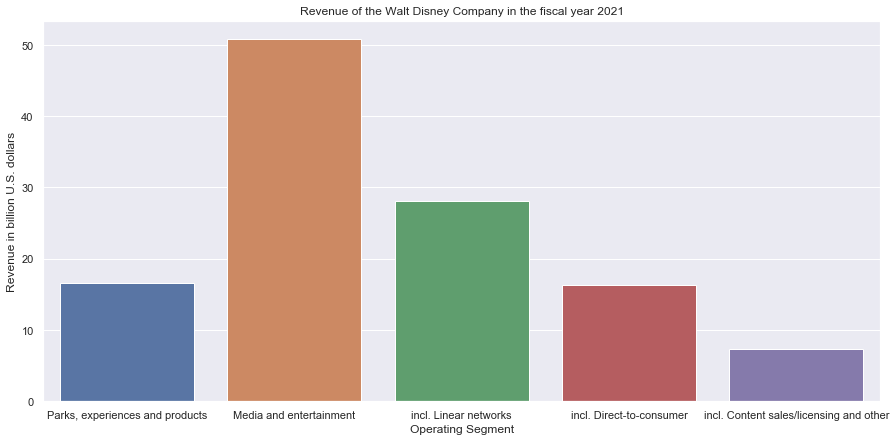

In [60]:
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Operating Segment", y = "Revenue in billion U.S. dollars", ax=ax, data=df).set(
    title='Revenue of the Walt Disney Company in the fiscal year 2021')

In [61]:
df = pd.read_csv("disney_movies.csv")
df = df.drop(['inflation_adjusted_gross'], axis=1)
df.head(5)

,movie_title,release_date,genre,mpaa_rating,total_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485
1,Pinocchio,1940-02-09,Adventure,G,84300000
2,Fantasia,1940-11-13,Musical,G,83320000
3,Song of the South,1946-11-12,Adventure,G,65000000
4,Cinderella,1950-02-15,Drama,G,85000000


In [62]:
df.isna().sum()

movie_title      0
release_date     0
genre           17
mpaa_rating     56
total_gross      0
dtype: int64

In [63]:
df['mpaa_rating'] = df['mpaa_rating'].fillna("Not Rated")
df['genre'] = df['genre'].fillna("Not Known")
df.isna().sum()

movie_title     0
release_date    0
genre           0
mpaa_rating     0
total_gross     0
dtype: int64

In [64]:
df.describe()

,total_gross
count,5.790000e+02
mean,6.470179e+07
std,9.301301e+07
min,0.000000e+00
25%,1.278886e+07
50%,3.070245e+07
75%,7.570903e+07
max,9.366622e+08


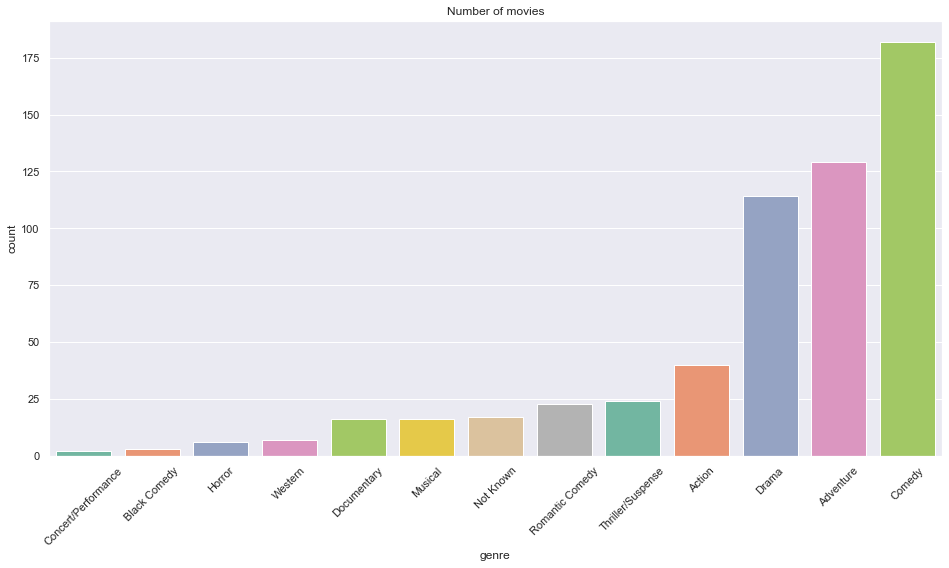

In [65]:
"""
Disney produces and distributes more comedies than any other genre, with adventure and action films 
accounting for the majority of the remaining films.
"""

plt.figure(figsize=(16,8))
ax = sns.countplot(x='genre', data=df, palette="Set2", order=df['genre'].value_counts().sort_values().index).set(
    title='Number of movies')
plt.xticks(rotation=45)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

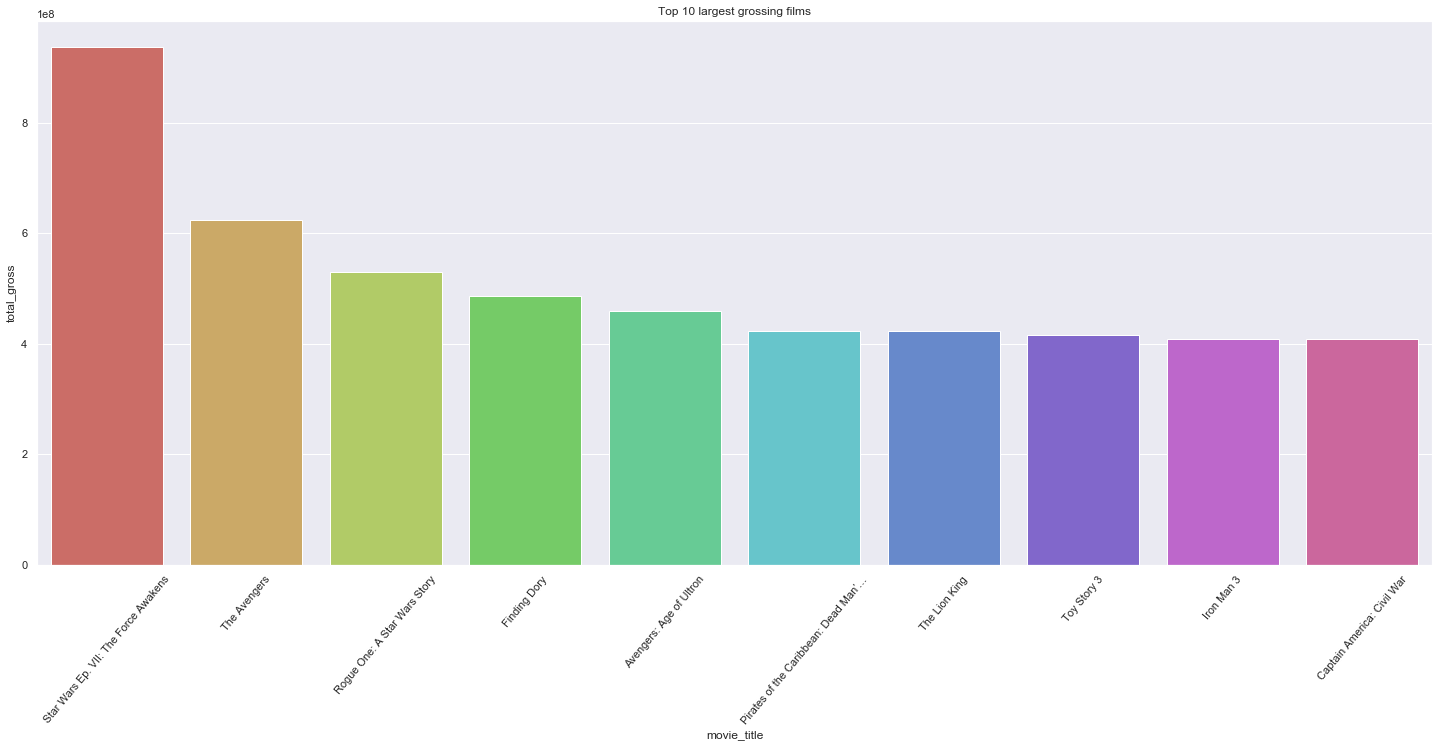

In [66]:
"""
Snow White is by far Disney's highest-grossing film; the gross has been adjusted to account for 
inflation over the previous century, and I believe, but cannot be confirmed, that the gross includes 
all of the film's various versions. This would help to explain the stratospheric disparity between Snow 
White's gross and that of other films, as well as the fact that it has earned 
for more than 80 years and is the sum of multiple releases' revenues at the same time.
"""

gross = df.sort_values(by=['total_gross'], ascending=False).head(10)

fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "movie_title", y = "total_gross", ax=ax, data=gross, palette="hls").set(
    title='Top 10 largest grossing films')

plt.xticks(rotation=50)

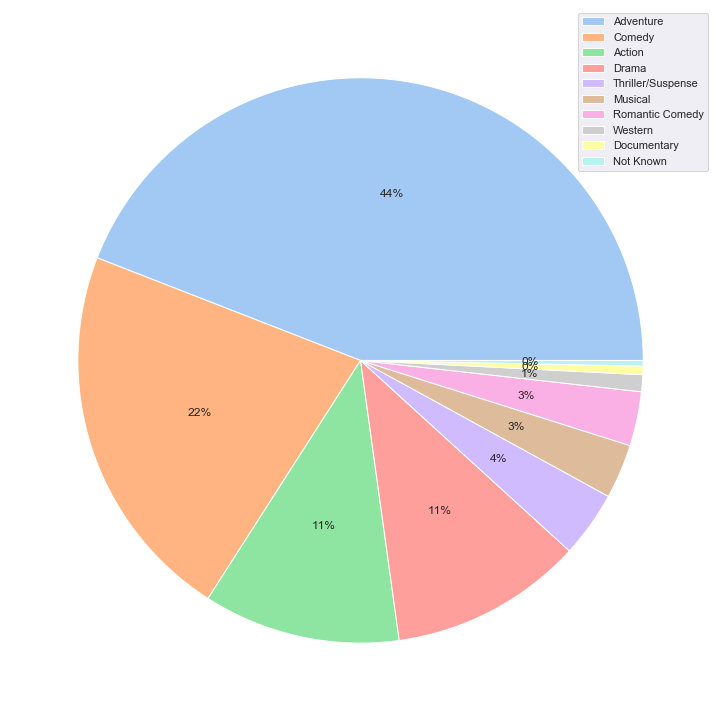

In [70]:
"""
Despite the fact that adventure isn't the genre with the most releases, we proved in section 1 that it was humor that 
brought in the most money for Disney so far.However, we demonstrated in section 2 that adventure films have been produced 
consistently over a longer period of time.They have stayed popular for longer than any other genre.
"""

plt.figure(figsize=(13, 13))
gross = df.groupby(['genre'])['total_gross'].sum().reset_index()
gross = gross.sort_values(by=['total_gross'], ascending=False).head(10)
labels = gross['genre']
colors = sns.color_palette('pastel')

plt.pie(gross['total_gross'], colors = colors, autopct = '%0.0f%%')
plt.legend(labels)
plt.show()